<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/data-science-bookcamp/case-study-1/03_random_simulations_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Running random simulations

This notebook focuses on randomized numerical
simulations. We will use NumPy to analyze billions of random data points; these
random observations will allow us to learn hidden probabilities.

##Setup

In [12]:
import numpy as np
import matplotlib.pyplot as plt


##Simulating random coin flips and die rolls

We can carry out random simulations using the `np.random`
module. That module is useful for generating random values and simulating random processes.

For instance, calling `np.random.randint(1, 7)` produces a random
integer between 1 and 6. 

The method chooses from the six possible integers with
equal likelihood, thus simulating a single roll of a standard die.


In [8]:
# Simulating a randomly rolled die
die_roll = np.random.randint(1, 7)
assert 1 <= die_roll <= 6

The inconsistency could make it difficult to perfectly re-create
certain random simulations.

We need a way of ensuring that all our random
outputs can be reproduced at home. 

Conveniently, consistency can easily be
maintained by calling `np.random.seed(0)`; this method call makes sequences of randomly
chosen values reproducible.



In [9]:
# Seeding reproducible random die rolls
np.random.seed(0)

die_rolls = [np.random.randint(1, 7) for _ in range(3)]
assert die_rolls == [5, 6, 1]

Adjusting the inputted x into `np.random.randint(0, x)` allows us to simulate any number of discrete outcomes.

For instance, setting x to 52 will simulate a randomly
drawn card. Alternatively, setting x to 2 will simulate a single flip of an unbiased coin.

Let’s generate that coin flip by calling np.random.randint(0, 2); this method call
returns a random value equal to either 0 or 1. 

We assume that 0 stands for tails and 1
stands for heads.

In [10]:
np.random.seed(0)

def frequency_heads(coin_flip_sequence):
  total_heads = len([head for head in coin_flip_sequence if head == 1])
  return total_heads / len(coin_flip_sequence)

In [11]:
coin_flips = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)

print(f"Frequency of Heads is {freq_heads}")

Frequency of Heads is 0.8


The observed frequency is 0.8, which is quite disproportionate to the actual probability of heads. 

However, 10 coin flips will produce such extreme frequencies
approximately 10% of the time. More coin flips are required to estimate the
actual probability.

Let’s see what happens when we flip the coin 1,000 times.

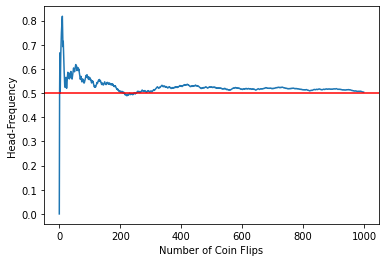

In [13]:
np.random.seed(0)

coin_flips = []
frequencies = []
for _ in range(1000):
  coin_flips.append(np.random.randint(0, 2))
  frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color="r")
plt.xlabel("Number of Coin Flips")
plt.ylabel("Head-Frequency")
plt.show()

The probability of heads slowly converges to 0.5. Thus, the law of large numbers appears to hold up.

###Analyzing biased coin flips